------------------------
#### Sequence models - text (Using STACKED LSTM)
---------------------------
- IMDB - text classification for sentiment analysis

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.datasets import imdb
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import matplotlib.pyplot as plt

In [29]:
%%time
# for the first time, the data load may about 2 mins
# Load the IMDb dataset with a vocabulary size limit
vocab_size = 20000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

CPU times: total: 1.73 s
Wall time: 4.13 s


In [30]:
# Pad sequences to ensure uniform length
max_len = 160  # experimentation
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test  = pad_sequences(X_test,  maxlen=max_len, padding='post')

print("x_train shape:", X_train.shape)
print("x_test shape:", X_test.shape)

x_train shape: (25000, 160)
x_test shape: (25000, 160)


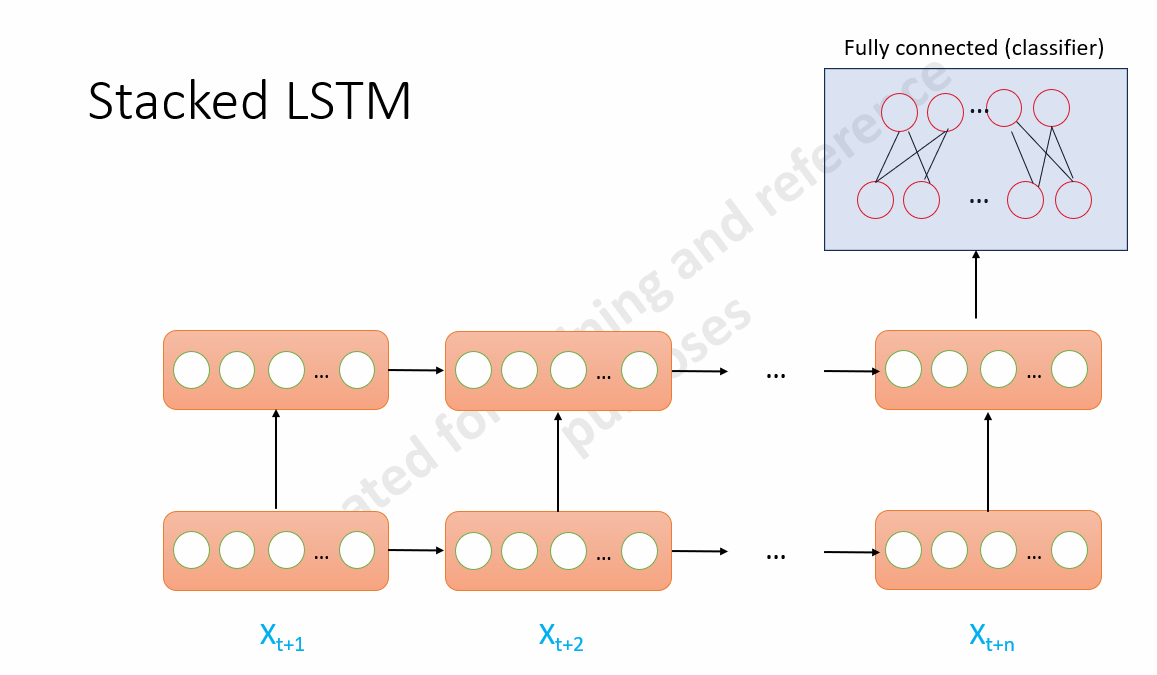

In [27]:
X_train[:1]

array([[   14,    22,     4,  1920,  4613,   469,     4,    22,    71,
           87,    12,    16,    43,   530,    38,    76,    15,    13,
         1247,     4,    22,    17,   515,    17,    12,    16,   626,
           18, 19193,     5,    62,   386,    12,     8,   316,     8,
          106,     5,     4,  2223,  5244,    16,   480,    66,  3785,
           33,     4,   130,    12,    16,    38,   619,     5,    25,
          124,    51,    36,   135,    48,    25,  1415,    33,     6,
           22,    12,   215,    28,    77,    52,     5,    14,   407,
           16,    82, 10311,     8,     4,   107,   117,  5952,    15,
          256,     4,     2,     7,  3766,     5,   723,    36,    71,
           43,   530,   476,    26,   400,   317,    46,     7,     4,
        12118,  1029,    13,   104,    88,     4,   381,    15,   297,
           98,    32,  2071,    56,    26,   141,     6,   194,  7486,
           18,     4,   226,    22,    21,   134,   476,    26,   480,
      

In [31]:
model = Sequential()
model.add(Embedding(input_dimp=vocab_size, output_dim=100, input_length=max_len))

# Stacked LSTM layers
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))  # Last LSTM layer without return_sequences

model.add(Dense(units=1, activation='sigmoid'))

In [32]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr      = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

epochs     = 100
batch_size = 64

In [19]:
%%time
epochs     = 100
batch_size = 64

#model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
# Train the model with callbacks
history = model.fit(X_train, 
                    y_train, 
                    batch_size     = batch_size, 
                    epochs         = epochs, 
                    validation_data= (X_test[:100], y_test[:100]),
                    callbacks      = [early_stopping, reduce_lr])

Epoch 1/100
391/391 [==============================] - 71s 156ms/step - loss: 0.4607 - accuracy: 0.7812 - val_loss: 0.2691 - val_accuracy: 0.8700 - lr: 0.0010
Epoch 2/100
391/391 [==============================] - 59s 150ms/step - loss: 0.2414 - accuracy: 0.9127 - val_loss: 0.2857 - val_accuracy: 0.8600 - lr: 0.0010
Epoch 3/100
391/391 [==============================] - 61s 156ms/step - loss: 0.1674 - accuracy: 0.9434 - val_loss: 0.3099 - val_accuracy: 0.8700 - lr: 0.0010
Epoch 4/100
391/391 [==============================] - 60s 152ms/step - loss: 0.1081 - accuracy: 0.9658 - val_loss: 0.3672 - val_accuracy: 0.8700 - lr: 0.0010
Epoch 5/100
391/391 [==============================] - 59s 151ms/step - loss: 0.0535 - accuracy: 0.9864 - val_loss: 0.5040 - val_accuracy: 0.8500 - lr: 2.0000e-04
Epoch 6/100
391/391 [==============================] - 59s 150ms/step - loss: 0.0373 - accuracy: 0.9918 - val_loss: 0.5353 - val_accuracy: 0.8700 - lr: 2.0000e-04
CPU times: total: 7min 27s
Wall time: 

In [20]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Print the evaluation results
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

782/782 [==============================] - 28s 36ms/step - loss: 0.3467 - accuracy: 0.8556
Test Loss: 0.3467
Test Accuracy: 0.8556


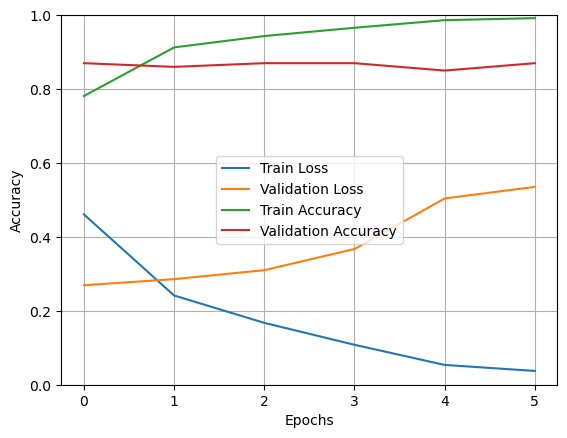

In [26]:
# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend()
plt.grid();